# Revenue by Genre

In [196]:
import pandas as pd
import get_imdb as gi
import movie_database_methods as imd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from statsmodels.graphics.mosaicplot import mosaic
import pylab
from itertools import product
import numpy as np
%matplotlib inline
sns.set()

In [2]:
imdb = gi.get_imdb()

In [3]:
imdb.head().T

,0,1,2,3,4
tconst,tt0063540,tt0066787,tt0069049,tt0069204,tt0100275
primary_title,Sunghursh,One Day Before the Rainy Season,The Other Side of the Wind,Sabse Bada Sukh,The Wandering Soap Opera
original_title,Sunghursh,Ashad Ka Ek Din,The Other Side of the Wind,Sabse Bada Sukh,La Telenovela Errante
start_year,2013,2019,2018,2018,2017
runtime_minutes,175,114,122,NaN,80
genres,"[Action, Crime, Drama]","[Biography, Drama]",[Drama],"[Comedy, Drama]","[Comedy, Drama, Fantasy]"
Action,1,0,0,0,0
Crime,1,0,0,0,0
Drama,1,1,1,1,1
Biography,0,1,0,0,0


In [4]:
tn = imd.tn_movie_budgets()

In [5]:
combined = imd.movies_combined(tn,imdb)

In [26]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3219 entries, 20 to 145599
Data columns (total 38 columns):
tconst               3219 non-null object
primary_title        3219 non-null object
original_title       3219 non-null object
start_year           3219 non-null int64
runtime_minutes      2853 non-null float64
genres               3219 non-null object
Action               3219 non-null int64
Crime                3219 non-null int64
Drama                3219 non-null int64
Biography            3219 non-null int64
Comedy               3219 non-null int64
Fantasy              3219 non-null int64
Horror               3219 non-null int64
Thriller             3219 non-null int64
Adventure            3219 non-null int64
Animation            3219 non-null int64
Documentary          3219 non-null int64
History              3219 non-null int64
Mystery              3219 non-null int64
Sci-Fi               3219 non-null int64
Romance              3219 non-null int64
Family               32

## Creating summary and Revenue Split

In [51]:
# add a genre count column
# not needed, can use len(combined.genres)

# revenue = revenue / genre count

# combined['Action']*combined['domestic_gross']
# combined[combined['Action']==1]['domestic_gross'].sum()
(combined['Action']*combined['domestic_gross']/len(combined['genres'])).sum()

14213849.563839704

In [181]:
combined['genre_count'] = combined.genres.map(lambda x: int(len(x)))
combined.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Crime,Drama,Biography,...,Talk-Show,Reality-TV,Game-Show,Short,id,release_date,production_budget,domestic_gross,worldwide_gross,genre_count
20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",1,0,0,0,...,0,0,0,0,26,"Dec 31, 2012",45000000.0,0.0,73706.0,3
33,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"[Action, Adventure, Fantasy]",1,0,0,0,...,0,0,0,0,10,"Aug 18, 1995",20000000.0,70433227.0,122133227.0,3
48,tt0337692,On the Road,On the Road,2012,124.0,"[Adventure, Drama, Romance]",0,0,1,0,...,0,0,0,0,17,"Mar 22, 2013",25000000.0,720828.0,9313302.0,3
39490,tt2404548,On the Road,On the Road,2011,90.0,[Drama],0,0,1,0,...,0,0,0,0,17,"Mar 22, 2013",25000000.0,720828.0,9313302.0,1
68078,tt3872966,On the Road,On the Road,2013,87.0,[Documentary],0,0,0,0,...,0,0,0,0,17,"Mar 22, 2013",25000000.0,720828.0,9313302.0,1


In [197]:
# add the genre_count variable to combined
combined['genre_count'] = combined.genres.map(lambda x: int(len(x)))
#create list of genres
genre_list = list(combined.loc[:,'Action':'Short'].keys())
#create dict of genres with value = 0
genre_dict = {}

for genre in genre_list:
    genre_dict[genre] = []
    genre_dict[genre].append (combined[genre].sum())
    genre_dict[genre].append (combined[combined[genre]==1]['domestic_gross'].sum())
    genre_dict[genre].append ((combined[combined[genre]==1]['domestic_gross'] / combined[combined[genre]==1]['genre_count']).sum())

#convert to df
genre_df = pd.DataFrame.from_dict(genre_dict, orient= 'index', columns = ['count', 'domestic_gross', 'domestic_gross_dltd'])
genre_df.reset_index(inplace = True)
genre_df.rename(columns = {'index': 'genre'},inplace = True)
genre_df

,genre,count,domestic_gross,domestic_gross_dltd
0,Action,616,4.575438e+10,1.654051e+10
1,Crime,352,1.171992e+10,4.463572e+09
2,Drama,1584,5.010039e+10,2.571123e+10
3,Biography,226,8.181126e+09,2.975064e+09
4,Comedy,760,3.835753e+10,1.692093e+10
5,Fantasy,174,1.439258e+10,5.544875e+09
6,Horror,336,1.129924e+10,6.252958e+09
7,Thriller,494,1.839453e+10,8.344851e+09
8,Adventure,441,4.867762e+10,1.716805e+10
9,Animation,134,1.645669e+10,6.126886e+09


## Visualization

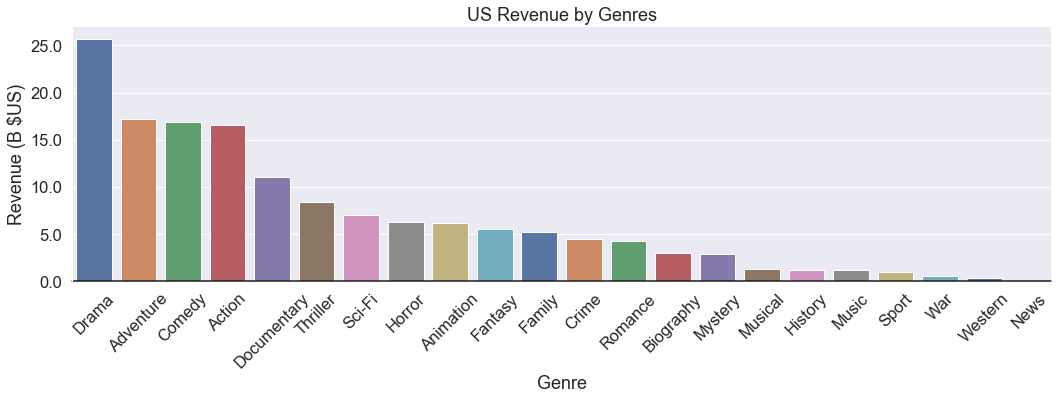

In [199]:
# Set up the matplotlib figure
f, ax1 = plt.subplots(1, 1, figsize=(15, 5), sharex=True)
# plot = sns.barplot(x = 'genre', y = 'domestic_gross_dltd', data = genre_df.sort_values(by='domestic_gross_dltd', ascending=False))

#Add Data
sns.barplot(x = 'genre', y = 'domestic_gross_dltd', data = genre_df[genre_df.domestic_gross_dltd > 0].sort_values(by='domestic_gross_dltd', ascending=False), ax=ax1, palette="deep")

#Add Attributues
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Revenue (B $US)")
ax1.set_xlabel("Genre")
ax1.set_title("US Revenue by Genres")

sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])  #adds / removes y-axis ticks
plt.tight_layout(h_pad=2)
plt.xticks(rotation=45)

# ylabels = ['{:,.2f}'.format(y) + 'K' for y in ax1.get_xticks()/1000000]
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)/10**9)))

#make font larger
sns.set(font_scale=1.5)

#show plot
plt.show()

In [86]:
combined.head().T

,20,33,48,39490,68078
tconst,tt0249516,tt0293429,tt0337692,tt2404548,tt3872966
primary_title,Foodfight!,Mortal Kombat,On the Road,On the Road,On the Road
original_title,Foodfight!,Mortal Kombat,On the Road,On the Road,On the Road
start_year,2012,2021,2012,2011,2013
runtime_minutes,91,NaN,124,90,87
genres,"[Action, Animation, Comedy]","[Action, Adventure, Fantasy]","[Adventure, Drama, Romance]",[Drama],[Documentary]
Action,1,1,0,0,0
Crime,0,0,0,0,0
Drama,0,0,1,1,0
Biography,0,0,0,0,0


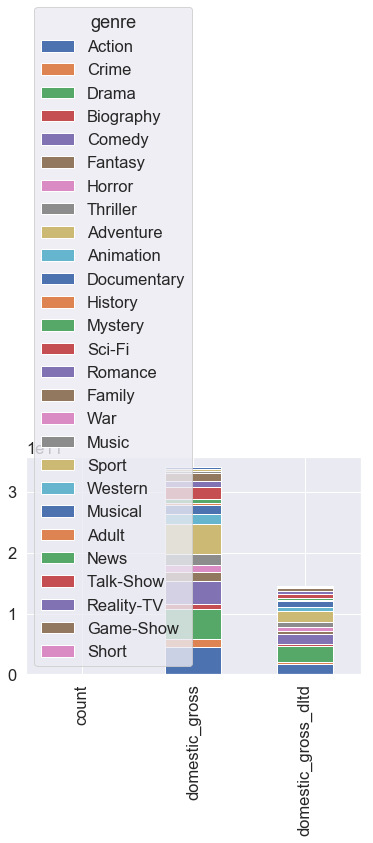

In [204]:
genre_df.set_index('genre').T.plot( kind='bar', stacked=True)